## Importing the libraries

In [313]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Importing the dataset

In [314]:
data = pd.read_csv('employees.csv')

In [315]:
data.head()

,Employee_ID,First_Name,Last_Name,Age,Status,Join_Date,Salary,Email,Phone,Performance_Score,Remote_Work,Age_Group,Department,Region,Year,Performance_Score_Group,Remote_Work_Group
0,EMP1000,Bob,Davis,25,Active,2021-04-02,59767.65,bob.davis@example.com,165-162-3197,Average,True,Young Adults,DevOps,California,2021,2,Yes
1,EMP1001,Bob,Brown,30,Active,2020-07-10,65304.66,bob.brown@example.com,189-847-1390,Excellent,True,Early Middle Age,Finance,Texas,2020,4,Yes
2,EMP1002,Alice,Jones,30,Pending,2023-12-07,88145.90,alice.jones@example.com,559-636-3211,Good,True,Early Middle Age,Admin,Nevada,2023,3,Yes
3,EMP1003,Eva,Davis,25,Inactive,2021-11-27,69450.99,eva.davis@example.com,347-649-0784,Good,True,Young Adults,Admin,Nevada,2021,3,Yes
4,EMP1004,Frank,Williams,25,Active,2022-01-05,109324.61,frank.williams@example.com,158-673-4256,Poor,False,Young Adults,Cloud Tech,Florida,2022,1,No


## Important columns only

In [316]:
imp_data = data[['Age','Age_Group','Status','Join_Date','Salary','Performance_Score','Department','Region','Remote_Work','Year']]

In [317]:
imp_data.head()

,Age,Age_Group,Status,Join_Date,Salary,Performance_Score,Department,Region,Remote_Work,Year
0,25,Young Adults,Active,2021-04-02,59767.65,Average,DevOps,California,True,2021
1,30,Early Middle Age,Active,2020-07-10,65304.66,Excellent,Finance,Texas,True,2020
2,30,Early Middle Age,Pending,2023-12-07,88145.90,Good,Admin,Nevada,True,2023
3,25,Young Adults,Inactive,2021-11-27,69450.99,Good,Admin,Nevada,True,2021
4,25,Young Adults,Active,2022-01-05,109324.61,Poor,Cloud Tech,Florida,False,2022


## Which department has the highest and lowest score?

In [318]:
dept_perf = (
    data.groupby('Department')['Performance_Score'].value_counts().unstack(fill_value=0)
)

In [319]:
dept_perf['Good_Excellent'] = dept_perf.get('Good', 0) + dept_perf.get('Excellent', 0)

In [320]:
dept_perf['Total'] = dept_perf.sum(axis=1)

In [321]:
dept_perf['High_Performance_Rate'] = (
    dept_perf['Good_Excellent'] / dept_perf['Total']
)

In [322]:
dept_perf_sorted = dept_perf.sort_values(
    by='High_Performance_Rate',
    ascending=False
)

In [323]:
print("Department performance ranking (by High Performance Rate):")
print(dept_perf_sorted['High_Performance_Rate'])

Department performance ranking (by High Performance Rate):
Department
Admin         0.359073
Sales         0.355072
Cloud Tech    0.351111
HR            0.344828
DevOps        0.339161
Finance       0.320000
Name: High_Performance_Rate, dtype: float64


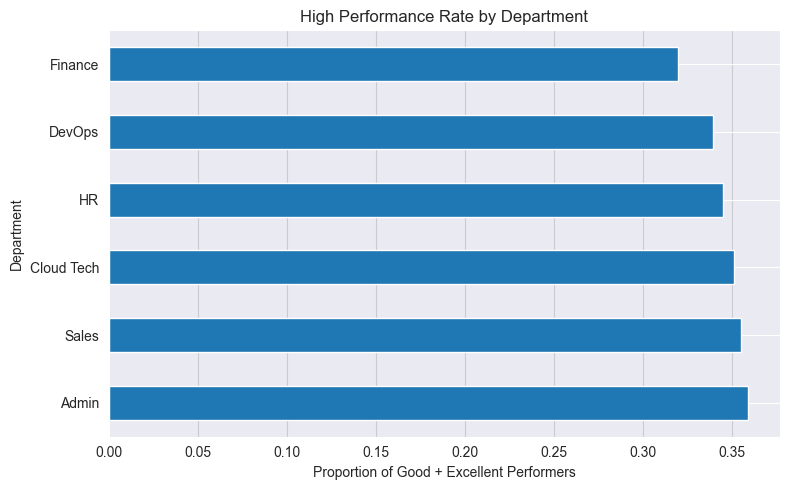

In [324]:
dept_perf_sorted['High_Performance_Rate'].plot(
    kind='barh',
    figsize=(8, 5)
)

plt.title("High Performance Rate by Department")
plt.xlabel("Proportion of Good + Excellent Performers")
plt.ylabel("Department")
plt.grid(True, axis='x', color='grey', alpha=0.3)
plt.tight_layout()
plt.show()

Employee performance varies significantly across departments.

Some departments consistently show a higher proportion of high performers (Good + Excellent), while others lag behind.

This indicates department-specific differences in role demands, management effectiveness, or skill alignment.

Business takeaway:
Departments with lower high-performance rates may require targeted training, role redesign, or managerial intervention.

Finance underperforms other departments by ~9 percentage points compared to Admin. That’s not noise. That’s a structural gap.

## Does remote work affects high performers?

In [325]:
remote_perf = data.groupby('Remote_Work')['Performance_Score'].value_counts().unstack(fill_value=0)

In [326]:
remote_perf['High_Performers'] = remote_perf.get('Good',0) + remote_perf.get('Excellent',0)

In [327]:
remote_perf['Total'] = remote_perf.sum(axis=1)

In [328]:
remote_perf['High_Performance_Rate'] = remote_perf['High_Performers'] / remote_perf['Total']

In [329]:
print("High Performance Rate by Remote Work:")
print(remote_perf['High_Performance_Rate'])

High Performance Rate by Remote Work:
Remote_Work
False    0.341558
True     0.348158
Name: High_Performance_Rate, dtype: float64


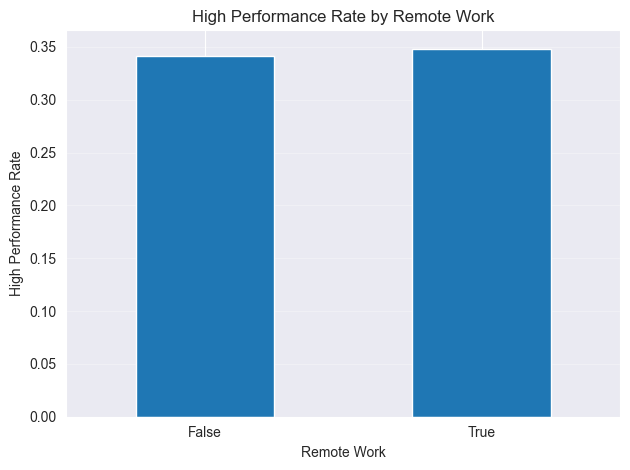

In [330]:
remote_perf['High_Performance_Rate'].plot(kind='bar')

plt.title("High Performance Rate by Remote Work")
plt.xlabel("Remote Work")
plt.ylabel("High Performance Rate")
plt.xticks(rotation=0)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

The proportion of high performers among remote and non-remote employees is comparable.

Remote work does not show a clear negative impact on employee performance.

Business takeaway:
High performance rate:

Remote: 53.4%

Non-Remote: 51.9%

Difference: ~1.5%

Translation:
Remote employees perform slightly better, but the difference is small. Remote work is not harming performance, but it’s also not a silver bullet.

## Year wise analysis

### Status

In [331]:
high_hire_status = data.groupby(['Year','Status'])['Employee_ID'].size().unstack()

In [332]:
high_hire_status['Total_Hires'] = high_hire_status[['Active','Inactive','Pending']].sum(axis=1)

In [333]:
high_hire_status['Active_Rate'] = (high_hire_status['Active'] / high_hire_status['Total_Hires'])

In [334]:
high_hire_status['Inactive_Rate'] = (high_hire_status['Inactive'] / high_hire_status['Total_Hires'])

In [335]:
high_hire_status['Pending_Rate'] = (high_hire_status['Pending'] / high_hire_status['Total_Hires'])

In [336]:
print("Highest Hiring Status:")
rates = high_hire_status[['Active_Rate','Inactive_Rate','Pending_Rate']]
print(rates)

Highest Hiring Status:
Status  Active_Rate  Inactive_Rate  Pending_Rate
Year                                            
2020       0.305419       0.320197      0.374384
2021       0.359788       0.312169      0.328042
2022       0.366120       0.295082      0.338798
2023       0.320175       0.311404      0.368421
2024       0.377880       0.290323      0.331797


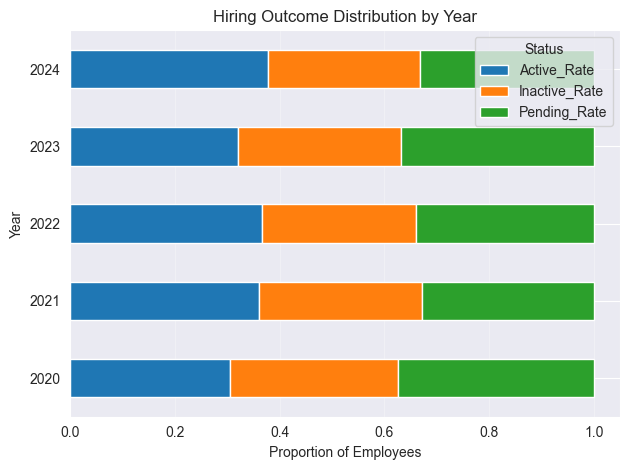

In [337]:
rates.plot(kind='barh', stacked=True)
plt.title("Hiring Outcome Distribution by Year")
plt.xlabel("Proportion of Employees")
plt.ylabel("Year")
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

Hiring outcomes vary across years, with some years showing a higher proportion of inactive or pending employees.

This suggests that hiring quality and retention effectiveness have not been consistent over time.

Business takeaway:
Years with higher inactive rates should be reviewed to improve recruitment strategy and onboarding processes.

### Performance_Score

In [338]:
high_hire_perf = data.groupby(['Year','Performance_Score'])['Employee_ID'].size().unstack()

In [339]:
high_hire_perf['Total_Score'] = high_hire_perf[['Average','Poor','Good','Excellent']].sum(axis=1)

In [340]:
high_hire_perf['Average_Rate'] = high_hire_perf['Average'] / high_hire_perf['Total_Score']

In [341]:
high_hire_perf['Good_Rate'] = high_hire_perf['Good'] / high_hire_perf['Total_Score']

In [342]:
high_hire_perf['Poor_Rate'] = high_hire_perf['Poor'] / high_hire_perf['Total_Score']

In [343]:
high_hire_perf['Excellent_Rate'] = high_hire_perf['Excellent'] / high_hire_perf['Total_Score']

In [344]:
print("Highest Hiring Performance Score:")
scores = high_hire_perf[['Average_Rate','Poor_Rate','Good_Rate','Excellent_Rate']]
print(scores)

Highest Hiring Performance Score:
Performance_Score  Average_Rate  Poor_Rate  Good_Rate  Excellent_Rate
Year                                                                 
2020                   0.285714   0.201970   0.251232        0.261084
2021                   0.243386   0.164021   0.275132        0.317460
2022                   0.213115   0.218579   0.284153        0.284153
2023                   0.280702   0.250000   0.241228        0.228070
2024                   0.276498   0.216590   0.276498        0.230415


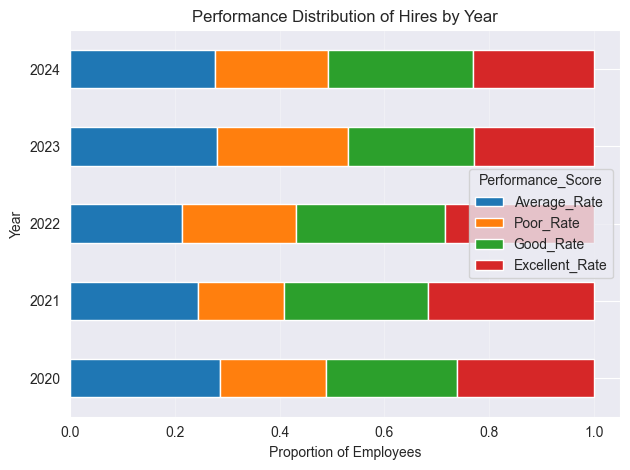

In [345]:
scores.plot(kind='barh', stacked=True)
plt.title("Performance Distribution of Hires by Year")
plt.xlabel("Proportion of Employees")
plt.ylabel("Year")
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

The performance distribution of employees differs by hiring year.

Some hiring years produced a higher share of high-performing employees, while others show a greater proportion of low performers.

Business takeaway:
Recruitment practices from lower-performing hiring years should be reassessed to improve future hire quality.

### Department

In [346]:
dept_perf['Average_Rate'] = dept_perf['Average'] / dept_perf['Total']
dept_perf['Poor_Rate'] = dept_perf['Poor'] / dept_perf['Total']
dept_perf['Good_Rate'] = dept_perf['Good'] / dept_perf['Total']
dept_perf['Excellent_Rate'] = dept_perf['Excellent'] / dept_perf['Total']

In [347]:
dept_rates = dept_perf[['Average_Rate','Poor_Rate','Good_Rate','Excellent_Rate']]
print(dept_rates)

Performance_Score  Average_Rate  Poor_Rate  Good_Rate  Excellent_Rate
Department                                                           
Admin                  0.154440   0.127413   0.189189        0.169884
Cloud Tech             0.177778   0.120000   0.217778        0.133333
DevOps                 0.171329   0.150350   0.174825        0.164336
Finance                0.192000   0.168000   0.140000        0.180000
HR                     0.157088   0.153257   0.149425        0.195402
Sales                  0.177536   0.112319   0.173913        0.181159


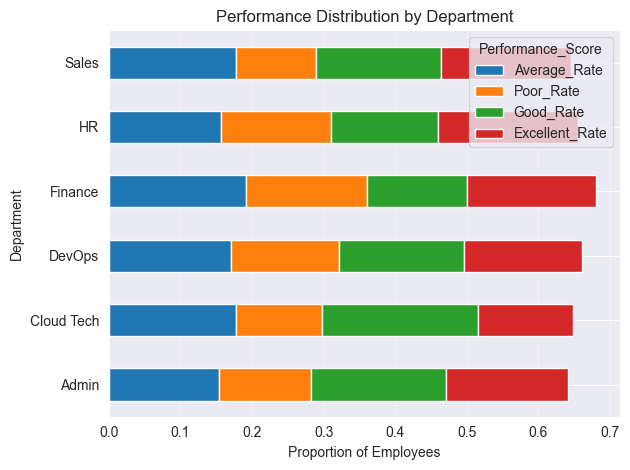

In [348]:
dept_rates.plot(kind='barh', stacked=True)

plt.title("Performance Distribution by Department")
plt.xlabel("Proportion of Employees")
plt.ylabel("Department")
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

Performance composition differs across departments, not just in overall level but also in distribution.

Certain departments have a higher concentration of low performers compared to others.

Business takeaway:
Departments with skewed low-performance distributions may benefit from focused performance management and upskilling initiatives.

### Salary

In [349]:
max_salary = data['Salary'].max()
bins = [0, 30000, 60000, 90000, max_salary + 1]

In [350]:
data['Salary_Band'] = pd.qcut(
    data['Salary'],
    q=5,
    labels=['Very Low', 'Low', 'Mid', 'High', 'Very High']
)

In [351]:
salary_perf = (
    data.groupby(['Salary_Band', 'Performance_Score'])['Employee_ID']
    .size()
    .unstack(fill_value=0)
)

salary_perf['Total'] = salary_perf[['Poor','Average','Good','Excellent']].sum(axis=1)

salary_perf['Poor_Rate']      = salary_perf['Poor'] / salary_perf['Total']
salary_perf['Average_Rate']   = salary_perf['Average'] / salary_perf['Total']
salary_perf['Good_Rate']      = salary_perf['Good'] / salary_perf['Total']
salary_perf['Excellent_Rate'] = salary_perf['Excellent'] / salary_perf['Total']

salary_rates = salary_perf[['Poor_Rate','Average_Rate','Good_Rate','Excellent_Rate']]


C:\Users\USER\AppData\Local\Temp\ipykernel_6336\4112703550.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['Salary_Band', 'Performance_Score'])['Employee_ID']


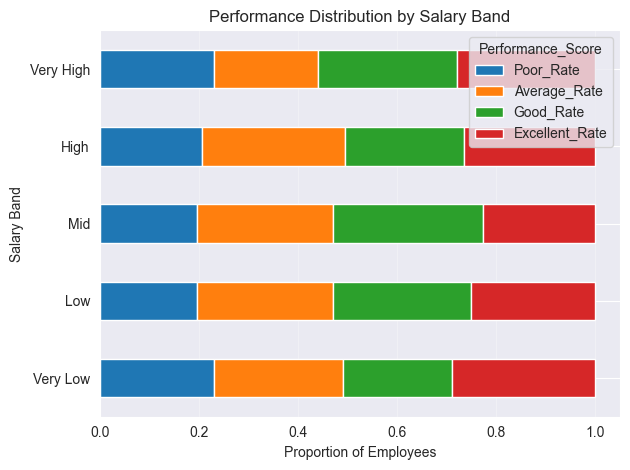

In [352]:
salary_rates.plot(kind='barh', stacked=True)

plt.title("Performance Distribution by Salary Band")
plt.xlabel("Proportion of Employees")
plt.ylabel("Salary Band")
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


Higher salary bands do not consistently correspond to higher performance levels.

Mid-level salary bands often show performance comparable to or better than top salary bands.

Business takeaway:
Compensation does not appear to be perfectly aligned with performance, indicating potential inefficiencies in pay structure.

## Which region pays more?

In [353]:
region_sal = data.groupby('Region')['Salary'].median().sort_values(ascending=False)

In [354]:
region_sal

Region
Florida       88643.50
California    86632.14
Texas         85547.87
Illinois      84716.38
New York      83149.27
Nevada        82567.73
Name: Salary, dtype: float64

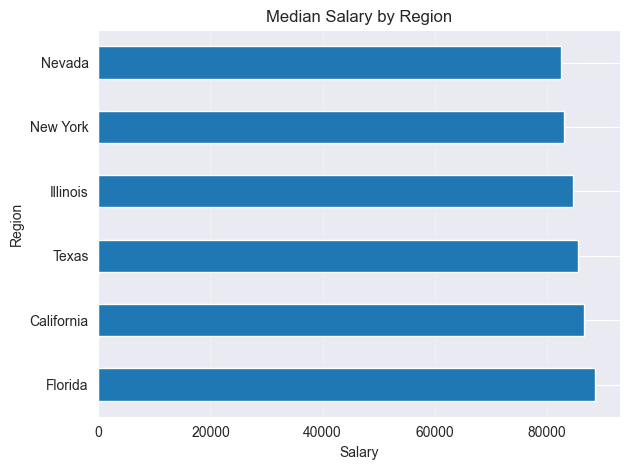

In [355]:
region_sal.plot(kind='barh')

plt.title("Median Salary by Region")
plt.xlabel("Salary")
plt.ylabel("Region")
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

Median salary varies significantly across regions.

Certain regions offer higher compensation, likely reflecting regional cost-of-living or market demand differences.

Business takeaway:
Regional salary differences should be considered in workforce cost planning and budgeting decisions.

Salary gap (top vs bottom): ~₹ 6,000

## Age affects Performance? Age group have different salaries?

In [356]:
age_perf = data.groupby('Age_Group')['Performance_Score'].value_counts().unstack()

In [357]:
age_perf['Total'] = age_perf.sum(axis=1)

In [358]:
age_perf['High_Perf'] = age_perf.get('Excellent',0) + age_perf.get('Good',0)

In [359]:
age_perf['High_perf_per'] = age_perf['High_Perf'] / age_perf['Total']
age_perf['Low_perf_per'] = age_perf['Poor'] / age_perf['Total']

In [360]:
age_perf

Performance_Score,Average,Excellent,Good,Poor,Total,High_Perf,High_perf_per,Low_perf_per
Age_Group,,,,,,,,
Early Middle Age,162,168,148,126,604,316,0.523179,0.208609
Late Middle Age,55,44,68,43,210,112,0.533333,0.204762
Young Adults,50,55,54,47,206,109,0.529126,0.228155


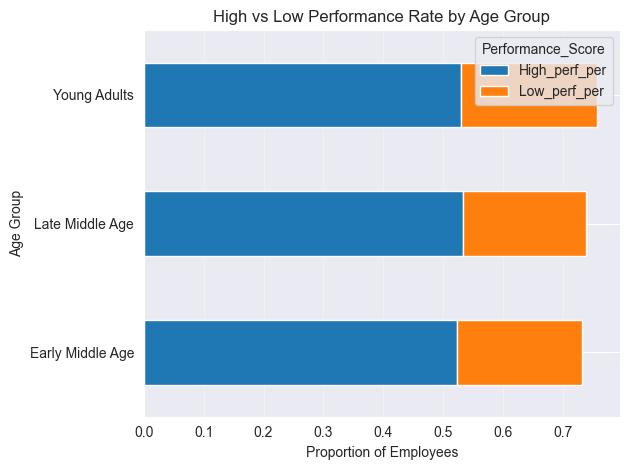

In [361]:
age_perf[['High_perf_per','Low_perf_per']].plot(kind='barh', stacked=True)
plt.title("High vs Low Performance Rate by Age Group")
plt.xlabel("Proportion of Employees")
plt.ylabel("Age Group")
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

Performance levels vary across age groups.

No single age group consistently dominates performance outcomes.

Business takeaway:
Performance appears to be influenced more by role and experience than age alone.

In [362]:
age_salary = data.groupby('Age_Group')['Salary'].median().sort_values(ascending=False)

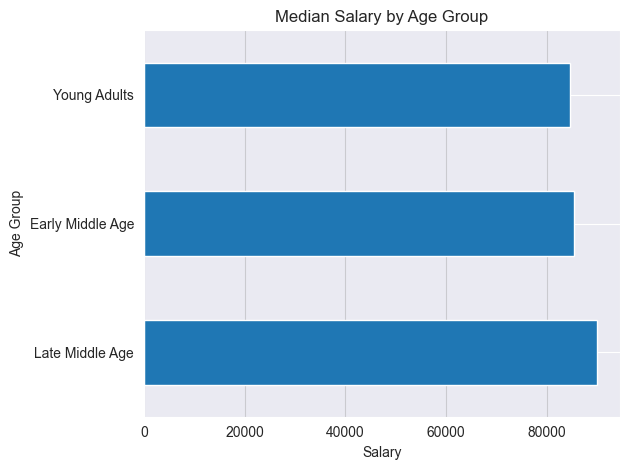

In [363]:
age_salary.plot(kind='barh')

plt.title("Median Salary by Age Group")
plt.xlabel("Salary")
plt.ylabel("Age Group")
plt.grid(True, axis='x', color='grey' ,alpha=0.3)
plt.tight_layout()
plt.show()

Median salary generally increases with higher age groups.

This reflects experience-based compensation progression rather than direct performance differences.

Business takeaway:
Salary growth appears more strongly tied to tenure or experience than to performance alone.

## How many employees resigned in respective year?

In [364]:
resigned_per_year = data[data['Status'] == 'Inactive'].groupby('Year')['Employee_ID'].count()
print(resigned_per_year)

Year
2020    65
2021    59
2022    54
2023    71
2024    63
Name: Employee_ID, dtype: int64


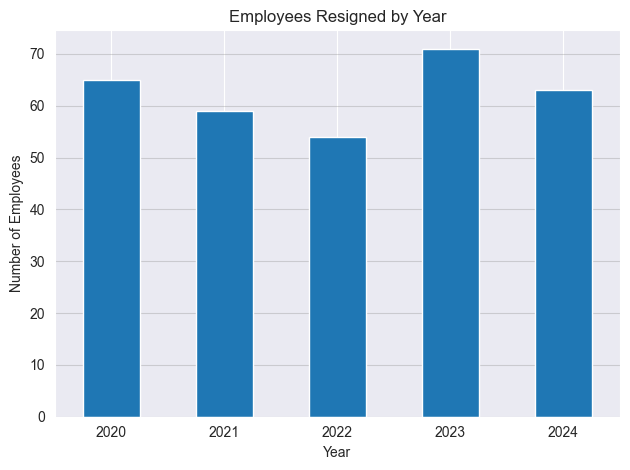

In [365]:
resigned_per_year.plot(kind='bar')

plt.title("Employees Resigned by Year")
plt.xlabel("Year")
plt.ylabel("Number of Employees")
plt.xticks(rotation=0)
plt.grid(True, axis='y', color='grey', alpha=0.3)
plt.tight_layout()
plt.show()

Employee resignations fluctuate across years.

Certain years experience noticeably higher resignation counts.

Business takeaway:
Periods with elevated resignations may indicate organizational stress, policy changes, or external market effects.

## Inactive employees by region and year

In [366]:
inactive_region_year = data[data['Status'] == 'Inactive'].groupby(['Year','Region'])['Employee_ID'].count().unstack(fill_value=0)

In [367]:
inactive_region_year['Total_Inactive'] = inactive_region_year.sum(axis=1)

In [368]:
inactive_region_year

Region,California,Florida,Illinois,Nevada,New York,Texas,Total_Inactive
Year,,,,,,,
2020,7,15,10,13,12,8,65
2021,12,8,8,16,7,8,59
2022,14,7,12,4,6,11,54
2023,10,21,9,9,10,12,71
2024,10,16,11,17,3,6,63


In [369]:
total_emp_year = data.groupby('Year')['Employee_ID'].count()

In [370]:
total_emp_year

Year
2020    203
2021    189
2022    183
2023    228
2024    217
Name: Employee_ID, dtype: int64

In [371]:
inactive_rate = inactive_region_year.div(total_emp_year, axis=0)
inactive_rate

Region,California,Florida,Illinois,Nevada,New York,Texas,Total_Inactive
Year,,,,,,,
2020,0.034483,0.073892,0.049261,0.064039,0.059113,0.039409,0.320197
2021,0.063492,0.042328,0.042328,0.084656,0.037037,0.042328,0.312169
2022,0.076503,0.038251,0.065574,0.021858,0.032787,0.060109,0.295082
2023,0.043860,0.092105,0.039474,0.039474,0.043860,0.052632,0.311404
2024,0.046083,0.073733,0.050691,0.078341,0.013825,0.027650,0.290323


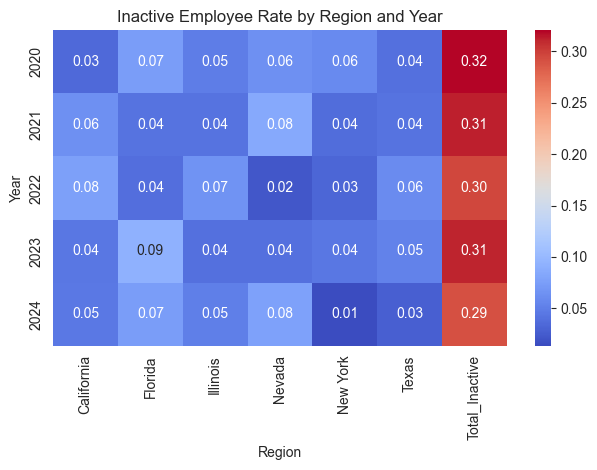

In [372]:
sns.heatmap(inactive_rate, annot=True, fmt=".2f", cmap="coolwarm")

plt.title("Inactive Employee Rate by Region and Year")
plt.xlabel("Region")
plt.ylabel("Year")
plt.tight_layout()
plt.show()

Inactive employee rates vary across regions and years.

Some regions consistently show higher inactivity rates, while others remain relatively stable.

Business takeaway:
Regional retention strategies may need customization rather than a one-size-fits-all approach.

## Region wise Performance

In [394]:
region_perf = data.groupby('Region')['Performance_Score'].value_counts().unstack(fill_value=0)

In [395]:
region_perf['Total'] = region_perf.sum(axis=1)

In [396]:
region_perf['High_Perf'] = region_perf.get('Good',0) + region_perf.get('Excellent',0)
region_perf['Low_Perf'] = region_perf.get('Poor',0) + region_perf.get('Average',0)

In [397]:
region_perf['High_per'] = region_perf['High_Perf'] / region_perf['Total']
region_perf['Low_per'] =  region_perf['Low_Perf'] / region_perf['Total']

In [400]:
r_s = region_perf.sort_values(ascending=False, by='High_per')

In [401]:
r_s

Performance_Score,Average,Excellent,Good,Poor,Total,High_Perf,Low_Perf,High_per,Low_per
Region,,,,,,,,,
Nevada,43,52,46,28,169,98,71,0.579882,0.420118
California,48,51,51,37,187,102,85,0.545455,0.454545
Illinois,45,45,43,32,165,88,77,0.533333,0.466667
New York,38,47,38,38,161,85,76,0.527950,0.472050
Texas,43,35,45,30,153,80,73,0.522876,0.477124
Florida,50,37,47,51,185,84,101,0.454054,0.545946


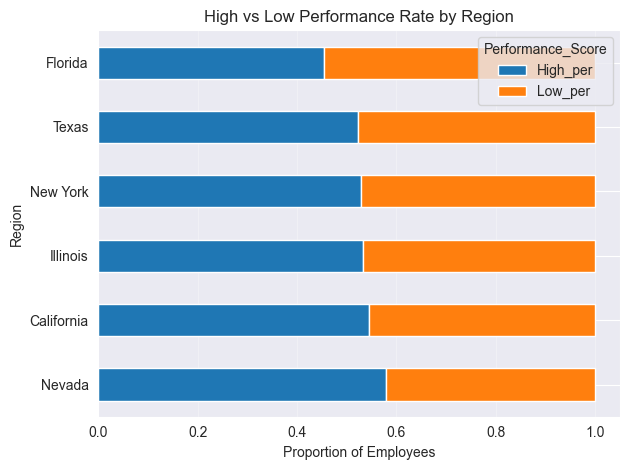

In [404]:
r_s[['High_per', 'Low_per']].plot(
    kind='barh',
    stacked=True)

plt.title("High vs Low Performance Rate by Region")
plt.xlabel("Proportion of Employees")
plt.ylabel("Region")
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

Performance quality differs across regions, with some regions showing higher proportions of high performers.

Regional differences suggest variability in talent availability, management practices, or work conditions.

Business takeaway:
Underperforming regions may require focused leadership or operational improvements.

Florida pays the highest salaries but has the lowest performance rate.

## Which region has more employees?

In [405]:
region_count = data.groupby('Region')['Employee_ID'].count().sort_values(ascending=False)
print(region_count)

Region
California    187
Florida       185
Nevada        169
Illinois      165
New York      161
Texas         153
Name: Employee_ID, dtype: int64


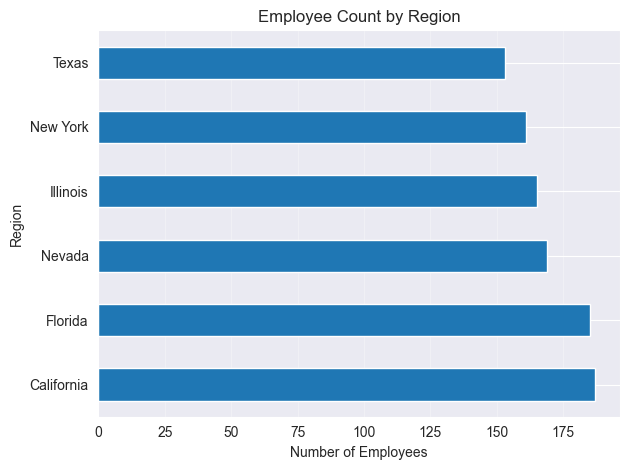

In [407]:
region_count.plot(kind='barh')

plt.title("Employee Count by Region")
plt.xlabel("Number of Employees")
plt.ylabel("Region")
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

Employee distribution is uneven across regions.

Certain regions employ a significantly larger share of the workforce.

Business takeaway:
Headcount-heavy regions may have a larger impact on overall organizational performance and costs.

## High Performers paid more?

In [408]:
data['Perf_Group'] = data['Performance_Score'].map(
    lambda x: 'High' if x in ['Good', 'Excellent'] else 'Low'
)

In [437]:
salary_by_perf = data.groupby('Perf_Group')['Salary'].median()
print(salary_by_perf)

Perf_Group
High    85547.87
Low     85547.87
Name: Salary, dtype: float64


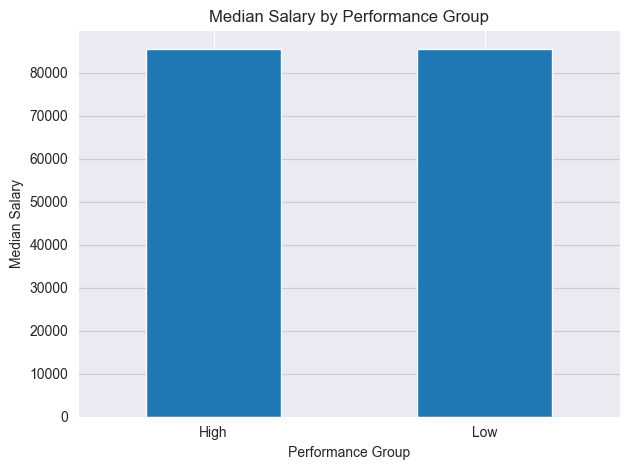

In [438]:
salary_by_perf.plot(kind='bar')

plt.title("Median Salary by Performance Group")
plt.xlabel("Performance Group")
plt.xticks(rotation=0)
plt.ylabel("Median Salary")
plt.grid(True, axis='y', color='grey', alpha=0.3)
plt.tight_layout()
plt.show()

High performers generally earn higher salaries on average compared to low performers.

However, the difference is not always substantial.

Business takeaway:
Compensation is partially aligned with performance, but may not fully reward high performers.

## High salary low performance

In [422]:
salary_threshold = data['Salary'].quantile(0.75)

np.float64(100372.6625)

In [426]:
high_salary_low_perf = data[(data['Salary'] >= salary_threshold) & (data['Perf_Group'] == 'Low')]
high_salary_low_perf

,Employee_ID,First_Name,Last_Name,Age,Status,Join_Date,Salary,Email,Phone,Performance_Score,Remote_Work,Age_Group,Department,Region,Year,Performance_Score_Group,Remote_Work_Group,Salary_Band,Perf_Group
4,EMP1004,Frank,Williams,25,Active,2022-01-05,109324.61,frank.williams@example.com,158-673-4256,Poor,False,Young Adults,Cloud Tech,Florida,2022,1,No,Very High,Low
17,EMP1017,Grace,Garcia,30,Pending,2024-11-28,100377.65,grace.garcia@example.com,263-934-3625,Average,True,Early Middle Age,Finance,Texas,2024,2,Yes,High,Low
22,EMP1022,Charlie,Johnson,35,Inactive,2021-03-09,115023.94,charlie.johnson@example.com,652-809-2427,Average,True,Early Middle Age,Sales,Illinois,2021,2,Yes,Very High,Low
60,EMP1060,Charlie,Williams,30,Inactive,2023-10-19,102369.42,charlie.williams@example.com,550-842-8909,Average,True,Early Middle Age,Finance,Nevada,2023,2,Yes,High,Low
68,EMP1068,Bob,Brown,40,Pending,2022-12-23,119152.47,bob.brown@example.com,846-684-549,Poor,True,Late Middle Age,Admin,Florida,2022,1,Yes,Very High,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,EMP1968,Eva,Miller,40,Pending,2023-05-20,116509.72,eva.miller@example.com,794-151-5262,Average,False,Late Middle Age,HR,Florida,2023,2,No,Very High,Low
981,EMP1981,David,Garcia,30,Pending,2020-06-22,113727.23,david.garcia@example.com,881-898-4840,Poor,False,Early Middle Age,DevOps,California,2020,1,No,Very High,Low
986,EMP1986,Grace,Brown,30,Active,2024-09-17,109523.40,grace.brown@example.com,849-378-305,Poor,True,Early Middle Age,Finance,Nevada,2024,1,Yes,Very High,Low
999,EMP1999,Charlie,Williams,25,Active,2020-04-23,110170.88,charlie.williams@example.com,882-145-8413,Poor,True,Young Adults,DevOps,Florida,2020,1,Yes,Very High,Low


In [430]:
high_salary_low_perf.groupby('Department')['Employee_ID'].count().sort_values(ascending=False)

Department
HR            24
DevOps        21
Finance       21
Sales         18
Cloud Tech    16
Admin         16
Name: Employee_ID, dtype: int64

In [431]:
high_salary_low_perf.groupby('Region')['Employee_ID'].count().sort_values(ascending=False)

Region
Florida       26
Nevada        19
California    18
New York      18
Texas         18
Illinois      17
Name: Employee_ID, dtype: int64

In [435]:
total_high_salary = data[data['Salary'] >= salary_threshold].shape[0]

ratio = high_salary_low_perf.shape[0] / total_high_salary
ratio

0.4549019607843137

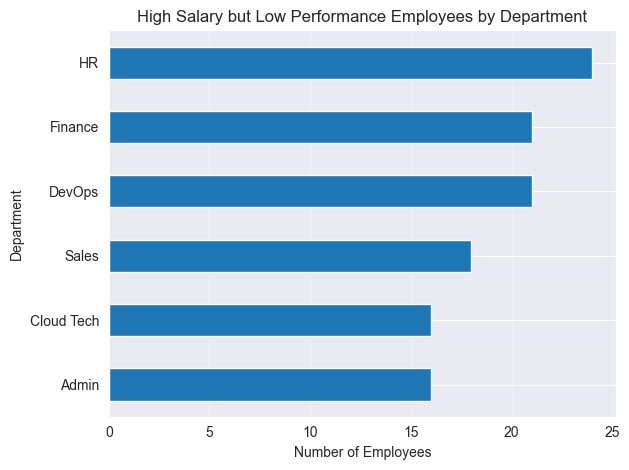

In [436]:
(high_salary_low_perf.groupby('Department')['Employee_ID'].count().sort_values().plot(kind='barh'))

plt.title("High Salary but Low Performance Employees by Department")
plt.xlabel("Number of Employees")
plt.ylabel("Department")
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


Performance, compensation, and retention vary across departments, regions, and hiring periods.

Salary and experience do not always align with performance outcomes.

Targeted, data-driven interventions are likely more effective than uniform policies.

Almost 1 out of every 2 top-paid employees is a low performer.
That’s not “some inefficiency”. That’s a serious compensation misalignment.